In [1]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials
import warnings; 
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
sp_data = pd.read_csv('Datasets/sp500_1987.csv', sep=",")

In [4]:
sp_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-12-31,243.369995,244.029999,241.279999,242.169998,242.169998,139200000
1,1987-01-02,242.169998,246.449997,242.169998,246.449997,246.449997,91880000
2,1987-01-05,246.449997,252.570007,246.449997,252.190002,252.190002,181900000
3,1987-01-06,252.199997,253.990005,252.139999,252.779999,252.779999,189300000
4,1987-01-07,252.779999,255.720001,252.649994,255.330002,255.330002,190900000


In [5]:
sp_data = sp_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [6]:
sp_data.head()

,Date,Adj Close
0,1986-12-31,242.169998
1,1987-01-02,246.449997
2,1987-01-05,252.190002
3,1987-01-06,252.779999
4,1987-01-07,255.330002


In [7]:
sp_data.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [8]:
sp_data.count()

Date     254
Close    254
dtype: int64

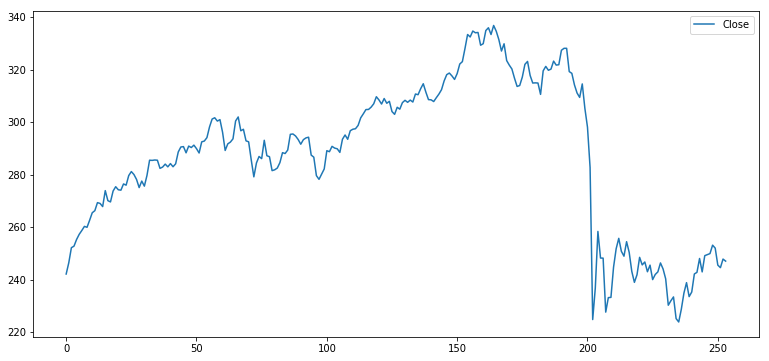

In [9]:
sp_data.plot(figsize=(13,6))

In [10]:
sp_data.dtypes

Date      object
Close    float64
dtype: object

In [11]:
sp_data['Date'] = pd.to_datetime(sp_data['Date'])

In [12]:
sp_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [13]:
sp_data = sp_data.sort_values(by='Date')

In [14]:
sp_data.head()

,Date,Close
0,1986-12-31,242.169998
1,1987-01-02,246.449997
2,1987-01-05,252.190002
3,1987-01-06,252.779999
4,1987-01-07,255.330002


In [15]:
sp_data['Returns'] = sp_data['Close'].pct_change()

In [16]:
sp_data.head()

,Date,Close,Returns
0,1986-12-31,242.169998,NaN
1,1987-01-02,246.449997,0.017674
2,1987-01-05,252.190002,0.023291
3,1987-01-06,252.779999,0.002339
4,1987-01-07,255.330002,0.010088


In [17]:
sp_data = sp_data.dropna()

In [18]:
sp_data.head()

,Date,Close,Returns
1,1987-01-02,246.449997,0.017674
2,1987-01-05,252.190002,0.023291
3,1987-01-06,252.779999,0.002339
4,1987-01-07,255.330002,0.010088
5,1987-01-08,257.279999,0.007637


In [19]:
sp_data.count()

Date       253
Close      253
Returns    253
dtype: int64

### Skewness and Kurtosis

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_skewness.html

https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.robust_kurtosis.html

In [20]:
sm.stats.stattools.robust_skewness(sp_data['Returns'])

(-4.044081087704749,
 0.03984664868454311,
 -0.11619235280851983,
 -3.1767027874230807)

In [21]:
sm.stats.stattools.robust_kurtosis(sp_data['Returns'], excess=True)

(42.58345466235547, 0.5304762295792742, 1.1704646966646632, 1.390895592550415)

#### Remove Oct 19, 1987 when there was a huge fall

In [22]:
sp_data_without_oct19 = sp_data[sp_data['Date'] != '1987-10-19']

sp_data_without_oct19.count()

Date       252
Close      252
Returns    252
dtype: int64

In [23]:
sm.stats.stattools.robust_skewness(sp_data_without_oct19['Returns'])

(0.020726711142432682,
 0.043100280764795884,
 -0.04892843466770149,
 -2.095631776088148)

In [24]:
sm.stats.stattools.robust_kurtosis(sp_data_without_oct19['Returns'], excess=True)

(7.623113750015866, 0.5073698405261666, 0.7952889689076326, 1.315515577230737)